In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import mglearn

%matplotlib inline

In [21]:
# define data
charge_eu = pd.read_csv("D:\creditCardFraudDetection_data/20170314_charge_eu.csv", encoding='utf-8-sig')
charge_na = pd.read_csv("D:\creditCardFraudDetection_data/20170314_charge_na.csv", encoding='utf-8-sig')
purchase_eu = pd.read_csv("D:\creditCardFraudDetection_data/20170411_purchase_eu.csv", encoding='utf-8-sig')
purchase_na = pd.read_csv("D:\creditCardFraudDetection_data/20170411_purchase_eu.csv", encoding='utf-8-sig')

In [22]:
def createAbuserDataSet(data_set):
    data_set = data_set[data_set.charge_status >= 60].drop_duplicates(['user_no'], keep='last')
        
    data_set = pd.DataFrame(data_set, columns=['user_no'])
    data_set['Class'] = 1
    return data_set
def createAllDataSet(data_set):
    data_set = pd.DataFrame(data_set, columns=['user_no']).drop_duplicates(['user_no'], keep='last')
    return data_set

eu 일반 유저의 수:  228078
na 일반 유저의 수:  130860
eu 환불 유저의 수:  726
na 환불 유저의 수:  921
전체 유저의 수:  360585
일반 유저의 비율:  0.9954324223137402
환불 유저의 비율:  0.004567577686259827


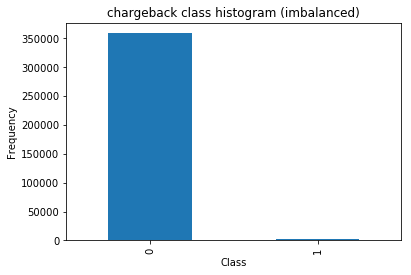

In [23]:
# 데이터 통합 및 일반 유저와 환불 유저의 비율
charge_eu_abuser = createAbuserDataSet(charge_eu)
charge_na_abuser = createAbuserDataSet(charge_na)

# 전체 유저에서 환불 유저를 뺀 것이 일반 유저
charge_eu_normal = createAllDataSet(charge_eu).drop(charge_eu_abuser.index)
charge_eu_normal['Class'] = 0
charge_na_normal = createAllDataSet(charge_na).drop(charge_na_abuser.index)
charge_na_normal['Class'] = 0
print("eu 일반 유저의 수: ", len(charge_eu_normal))
print("na 일반 유저의 수: ", len(charge_na_normal))
print("eu 환불 유저의 수: ", len(charge_eu_abuser))
print("na 환불 유저의 수: ", len(charge_na_abuser))

# 데이터 통합
charge_all = pd.concat([charge_eu_abuser, charge_eu_normal, charge_na_abuser, charge_na_normal])
print("전체 유저의 수: ", len(charge_all))
print("일반 유저의 비율: ", len(charge_all[charge_all.Class == 0]) / len(charge_all))
print("환불 유저의 비율: ", len(charge_all[charge_all.Class == 1]) / len(charge_all))
count_classes = pd.value_counts(charge_all['Class'], sort=True)
count_classes.plot(kind = 'bar')
plt.title("chargeback class histogram (imbalanced)")
plt.xlabel("Class")
plt.ylabel("Frequency")

In [355]:
# feature 생성 과정 (parameter = transaction list) _ original featurel들의 kind 계산
def createFeatureForKind(transactions):
    transactions = transactions[transactions.charge_status == 30]
    list1 = []
    list2 = []
    list3 = []
    list4 = []

    for user_id in charge_all.user_no:
        sample = transactions[transactions.user_no == user_id]
        list1.append(len(sample.drop_duplicates(['standard_country_code'])))
        list2.append(len(sample.drop_duplicates(['payment_method_no'])))
        list3.append(len(sample.drop_duplicates(['hash_ip'])))
        list4.append(len(sample.drop_duplicates(['charge_product_name'])))
          
    charge_all['standard_country_code_kind'] = list1
    charge_all['payment_method_no_kind'] = list2
    charge_all['hash_ip_kind'] = list3
    charge_all['charge_product_name_kind'] = list4    

In [196]:
charge_all.to_csv('charge_all.csv')

In [ ]:
transaction_charge = pd.concat([charge_eu, charge_na])
createFeature(transaction_charge)

In [233]:
# 저장된 charge_all 데이터 읽어오기
charge_all = pd.read_csv('charge_all.csv', encoding='utf-8-sig')

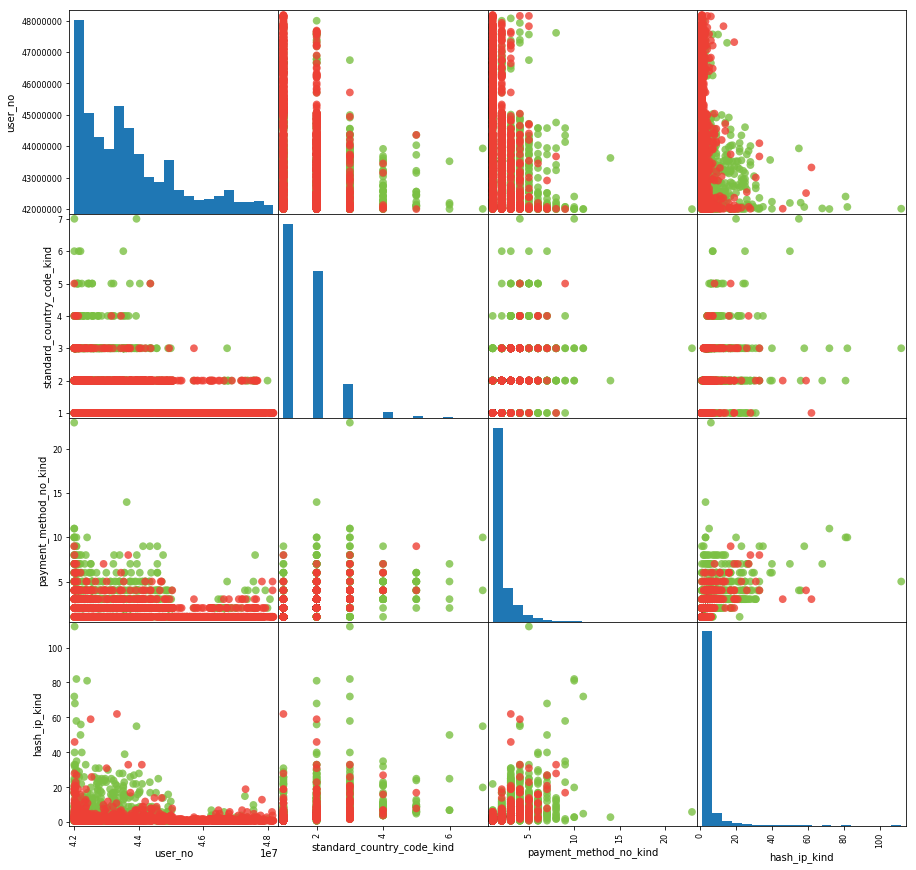

In [202]:
x_train_feature = x_train.iloc[:, 2:6]

color_wheel = {1: "#ee4035", 
               2: "#7bc043" }
colors = y_train["Class"].map(lambda x: color_wheel.get(x + 1))

ax = pd.plotting.scatter_matrix(x_train_feature, color=colors, figsize=(15, 15), marker="o", 
                           hist_kwds={'bins':20}, s=60, alpha=.8, cmap=mglearn.cm3)

In [234]:
# amount(charge, bonus), transaction 수를 위한 feature 생성
def createFeatureForAmount(transactions):
    transactions = transactions[transactions.charge_status == 30]
    list1 = []
    list2 = []
    list3 = []
    list4 = []
    list5 = []
    list6 = []
    list7 = []

    #for user_id in charge_all_sample.user_no:
    for user_id in charge_all.user_no:
        sample = transactions[transactions.user_no == user_id]
        list1.append(np.sum(sample.iloc[:, 6]))
        list2.append(np.mean(sample.iloc[:, 6]))
        list3.append(np.std(sample.iloc[:, 6]))
        list4.append(np.sum(sample.iloc[:, 7]))
        list5.append(np.mean(sample.iloc[:, 7]))
        list6.append(np.std(sample.iloc[:, 7]))         
        list7.append(len(sample.iloc[:, 7]))         
        
    #charge_all_sample['charge_amount_sum'] = list1
    #charge_all_sample['charge_amount_avg'] = list2
    #charge_all_sample['charge_amount_stddev'] = list3
    #charge_all_sample['bonus_amount_sum'] = list4
    #charge_all_sample['bonus_amount_avg'] = list5
    #charge_all_sample['bonus_amount_stddev'] = list6
    #charge_all_sample['transaction_cnt_sum'] = list7
    charge_all['charge_amount_sum'] = list1
    charge_all['charge_amount_avg'] = list2
    charge_all['charge_amount_stddev'] = list3
    charge_all['bonus_amount_sum'] = list4
    charge_all['bonus_amount_avg'] = list5
    charge_all['bonus_amount_stddev'] = list6
    charge_all['transaction_cnt_sum'] = list7

In [236]:
transaction_charge = pd.concat([charge_eu, charge_na])
createFeatureForAmount(transaction_charge)
charge_all_sample.iloc[:, 7:14] = charge_all_sample.iloc[:, 7:14].astype(np.float)

In [239]:
charge_all.iloc[:, 7:14] = charge_all.iloc[:, 7:14].astype(np.float)

In [240]:
charge_all.to_csv('charge_all2.csv')

In [263]:
# 저장된 charge_all 데이터 읽어오기
charge_all = pd.read_csv('charge_all2.csv', encoding='utf-8-sig')

In [264]:
# under sampling 과정
number_abuser = len(charge_all[charge_all.Class == 1])
abuser_indices = charge_all[charge_all.Class == 1].index
normal_indices = charge_all[charge_all.Class == 0].index

random_normal_indices = np.random.choice(normal_indices, number_abuser, replace = False)
random_normal_indices = np.array(random_normal_indices)

charge_all_sample_indices = np.concatenate([abuser_indices, random_normal_indices])

charge_all_sample = charge_all.iloc[charge_all_sample_indices, :]

x_train = charge_all_sample.iloc[:, charge_all_sample.columns != 'Class']
y_train = charge_all_sample.iloc[:, charge_all_sample.columns == 'Class']

In [265]:
charge_all_sample = charge_all_sample.drop(charge_all.columns[0:4], axis=1)

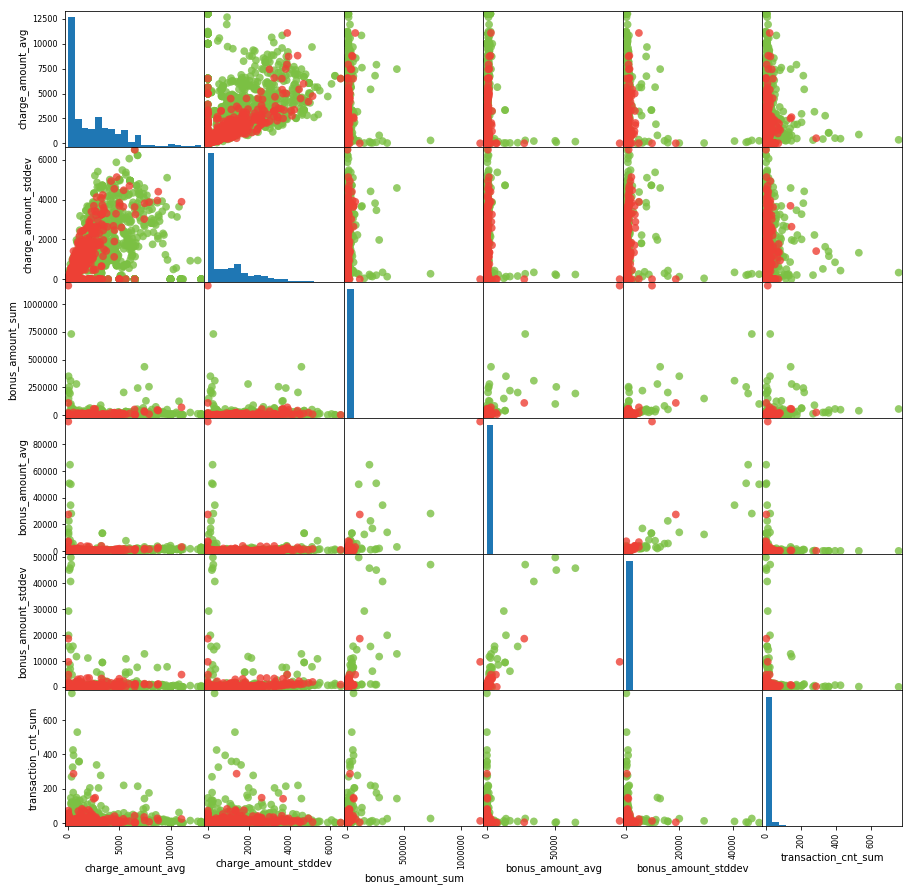

In [267]:
x_train2 = charge_all_sample.iloc[:, charge_all_sample.columns != 'Class']
y_train2 = charge_all_sample.iloc[:, charge_all_sample.columns == 'Class']
x_train_feature2 = x_train2.iloc[:, 5:14]

color_wheel = {1: "#ee4035", 
               2: "#7bc043" }
colors = y_train2["Class"].map(lambda x: color_wheel.get(x + 1))

ax = pd.plotting.scatter_matrix(x_train_feature2, color=colors, figsize=(15, 15), marker="o", 
                           hist_kwds={'bins':20}, s=60, alpha=.8, cmap=mglearn.cm3)

In [273]:
# sample data modeling
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = charge_all_sample.iloc[:, charge_all_sample.columns != 'Class']
y = charge_all_sample.iloc[:, charge_all_sample.columns == 'Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

forest = RandomForestClassifier(n_estimators=100, random_state=2)
forest.fit(X_train, y_train)
print("훈련 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

C:\Users\jgb710\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


훈련 세트 정확도: 0.991
테스트 세트 정확도: 0.903


In [269]:
forest.feature_importances_

array([ 0.00953034,  0.02365788,  0.02284093,  0.02303674,  0.3021838 ,
        0.23433213,  0.06807147,  0.12829491,  0.09647032,  0.04653427,
        0.04504722])

In [277]:
# charge_all을 기반으로 test 데이터를 만듦
charge_all = charge_all.drop(charge_all.columns[0:4], axis=1)

In [279]:
X = charge_all.iloc[:, charge_all.columns != 'Class']
y = charge_all.iloc[:, charge_all.columns == 'Class']

X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X, y, random_state=0)

In [296]:
from sklearn.metrics import precision_score, f1_score, recall_score
y_pred = forest.predict(X_test_all)
print(len(y_test_all))
print("precision- score: {}".format(precision_score(y_test_all, y_pred)))
print("recall- score: {}".format(recall_score(y_test_all, y_pred)))
print("f1- score: {}".format(f1_score(y_test_all, y_pred)))

90147
precision- score: 0.03329825616355983
recall- score: 0.977924944812362
f1- score: 0.06440357636112523


In [299]:
import itertools

from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report 


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

C:\Users\jgb710\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Recall metric in the testing dataset:  0.977924944812


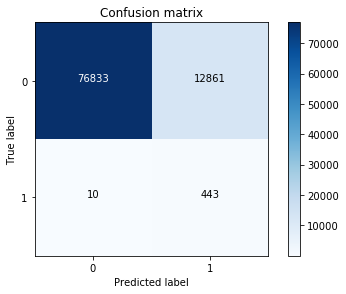

In [300]:
cnf_matrix = confusion_matrix(y_test_all,y_pred)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

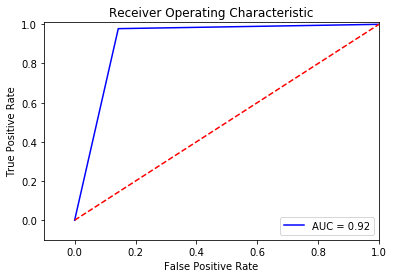

In [303]:
fpr, tpr, thresholds = roc_curve(y_test_all,y_pred)
roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()